## California Heat Assessment Tool - Vulnerability Data for Los Angeles City

This notebook is a review of the California Heat Assessment Tool's Vulnerability Data for the city of Los Angeles. The data represent population vulnerability projections during Heat Health Events in Los Angeles between 2011-2099.  

First, I import pandas and geopandas.

In [4]:
import pandas as pd
import geopandas as gpd

I then add the .csv file containing the vulnerability data to the notebook.

In [12]:
CHAT = gpd.read_file('data/CHAT_LosAngeles_vulnerability_indicators.csv')

I name the dataset "CHAT" for California Heat Assessment Tool. Next, I want to see what type of data it is.

In [13]:
type(CHAT)

geopandas.geodataframe.GeoDataFrame

The dataset is a geodataframe, which includes geographic data in a table format. To see what this looks like, I will use run "head" to see the first five rows.

In [14]:
CHAT.head()

,census_tract,census_county,census_city,heat_health_action_index,perc_children,perc_no_hs_diploma,perc_elderly,perc_outdoor_workers,tract_population,perc_poverty,...,cardio_disease_prevalence,perc_ambulatory_disability,perc_cognitive_disability,pm25_concentration,perc_impervious_surfaces,change_in_dev,perc_no_tree_canopy,uhii_avgdeltat,ozone_exceedance,geometry
0,6037181300,Los Angeles County,Los Angeles,28.49,6.50,9.80,19.90,0.00,3925,8.40,...,5.21,5.20,3.00,12.27,45.18,0.00,90.25,3.63,0.08,None
1,6037181400,Los Angeles County,Los Angeles,38.57,6.90,11.80,16.40,2.63,4619,14.50,...,8.14,6.40,5.50,12.28,58.65,0.00,92.57,3.84,0.08,None
2,6037181500,Los Angeles County,Los Angeles,27.06,5.20,13.40,17.70,1.96,3882,4.90,...,6.07,6.80,4.70,12.32,42.95,0.00,90.15,3.98,0.09,None
3,6037181600,Los Angeles County,Los Angeles,28.70,3.40,12.60,8.00,2.62,4632,7.40,...,5.83,3.50,2.70,12.33,45.02,0.00,91.22,3.64,0.08,None
4,6037183101,Los Angeles County,Los Angeles,35.29,4.50,26.40,12.00,7.62,3673,12.60,...,6.63,4.70,1.70,12.41,48.41,0.00,92.08,3.76,0.08,None


I can see that the first three columns include location data. 

I will also run "tail" to check out what the last five rows look like.

In [15]:
CHAT.tail()

,census_tract,census_county,census_city,heat_health_action_index,perc_children,perc_no_hs_diploma,perc_elderly,perc_outdoor_workers,tract_population,perc_poverty,...,cardio_disease_prevalence,perc_ambulatory_disability,perc_cognitive_disability,pm25_concentration,perc_impervious_surfaces,change_in_dev,perc_no_tree_canopy,uhii_avgdeltat,ozone_exceedance,geometry
613,6037700200,Los Angeles County,Los Angeles,37.60,0.40,3.20,11.60,0.47,6785,15.70,...,9.33,9.40,4.40,12.29,74.10,0.00,94.34,1.62,0.02,None
614,6037701100,Los Angeles County,Los Angeles,39.18,0.50,24.20,17.20,4.14,988,58.90,...,4.49,22.50,35.90,12.19,45.62,4.01,92.68,0.68,0.02,None
615,6037703100,Los Angeles County,Los Angeles,39.58,5.90,3.90,19.70,3.30,5524,8.50,...,7.94,3.20,3.20,12.58,49.05,4.12,92.47,0.28,0.00,None
616,6037703200,Los Angeles County,Los Angeles,43.04,9.60,5.00,18.10,2.37,6124,8.90,...,7.63,9.70,3.60,12.60,50.15,0.00,91.79,0.39,0.00,None
617,6037980009,Los Angeles County,Los Angeles,7.96,0.00,0.00,0.00,0.00,5,,...,5.77,0.00,0.00,12.15,3.52,10.74,81.93,,0.06,None


Next, I want to see more info on what the dataset contains. 

In [66]:
CHAT.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   census_tract                618 non-null    object  
 1   census_county               618 non-null    object  
 2   census_city                 618 non-null    object  
 3   heat_health_action_index    618 non-null    object  
 4   perc_children               618 non-null    object  
 5   perc_no_hs_diploma          618 non-null    object  
 6   perc_elderly                618 non-null    object  
 7   perc_outdoor_workers        618 non-null    object  
 8   tract_population            618 non-null    object  
 9   perc_poverty                618 non-null    object  
 10  perc_two_races              618 non-null    object  
 11  perc_nonwhite               618 non-null    object  
 12  perc_no_vehicle_access      618 non-null    object  
 13  perc_linguis

The table shows me the total number of entries, column categories, and Dtype, among other information.

Next, I want to know rows x columns, so I run "shape."

In [17]:
CHAT.shape

(618, 27)

If I want to see the list of column names only, I can run "columns.to_list()"

In [18]:
CHAT.columns.to_list()

['census_tract',
 'census_county',
 'census_city',
 'heat_health_action_index',
 'perc_children',
 'perc_no_hs_diploma',
 'perc_elderly',
 'perc_outdoor_workers',
 'tract_population',
 'perc_poverty',
 'perc_two_races',
 'perc_nonwhite',
 'perc_no_vehicle_access',
 'perc_linguistic_isolation',
 'perc_no_transit_access',
 'asthma_prevalence',
 'perc_low_birth_weight',
 'cardio_disease_prevalence',
 'perc_ambulatory_disability',
 'perc_cognitive_disability',
 'pm25_concentration',
 'perc_impervious_surfaces',
 'change_in_dev',
 'perc_no_tree_canopy',
 'uhii_avgdeltat',
 'ozone_exceedance',
 'geometry']

Next, I try running a value count under the ozone_exceedance column.

In [71]:
CHAT['ozone_exceedance'].value_counts()

0.02    189
0.01    186
0.03     83
0.00     81
0.04     27
0.05     19
0.06     13
0.07     11
0.08      8
0.09      1
Name: ozone_exceedance, dtype: int64

The resulting table provides the number of census tracts that fall into each ozone exceedance level.

Next, I save the value count as a variable.

In [20]:
ozone_count = CHAT['ozone_exceedance'].value_counts()
ozone_count

0.02    189
0.01    186
0.03     83
0.00     81
0.04     27
0.05     19
0.06     13
0.07     11
0.08      8
0.09      1
Name: ozone_exceedance, dtype: int64

I then want to check what type of data the ozone_count variable is.

In [ ]:
type(ozone_count)

pandas.core.series.Series

I want to try plotting the new variable, however it's not very useful in this format.

<AxesSubplot: >

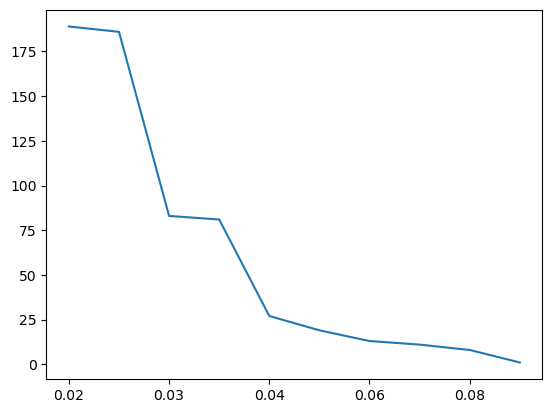

In [25]:
ozone_count.plot()

Instead, I provide more arguments to create a bar graph of the ozone_count variable.

<AxesSubplot: title={'center': 'Number of Census Tracts Exhibiting Ozone Levels from 0.00 to 0.09'}>

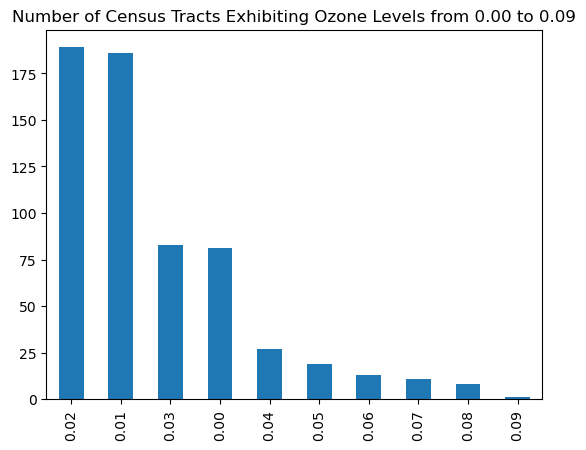

In [24]:
ozone_count.plot.bar(x = 'ozone', y = 'count', title = 'Number of Census Tracts Exhibiting Ozone Levels from 0.00 to 0.09')

The bar graph is able to show that most census tracts fall into the 0.01-0.02 range in terms of excessive ozone levels. 

Next, I want to prepare to run a query that filters the data more narrowly. I re-run .info() as a first step.

In [26]:
CHAT.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   census_tract                618 non-null    object  
 1   census_county               618 non-null    object  
 2   census_city                 618 non-null    object  
 3   heat_health_action_index    618 non-null    object  
 4   perc_children               618 non-null    object  
 5   perc_no_hs_diploma          618 non-null    object  
 6   perc_elderly                618 non-null    object  
 7   perc_outdoor_workers        618 non-null    object  
 8   tract_population            618 non-null    object  
 9   perc_poverty                618 non-null    object  
 10  perc_two_races              618 non-null    object  
 11  perc_nonwhite               618 non-null    object  
 12  perc_no_vehicle_access      618 non-null    object  
 13  perc_linguis

Based on this information, I decide which columns I would like to look at more closely.

I decided to show a dataframe of 8 columns.

In [31]:
CHAT[['census_tract','heat_health_action_index','perc_no_tree_canopy','perc_impervious_surfaces','tract_population','perc_nonwhite','perc_poverty','perc_no_hs_diploma']]

,census_tract,heat_health_action_index,perc_no_tree_canopy,perc_impervious_surfaces,tract_population,perc_nonwhite,perc_poverty,perc_no_hs_diploma
0,6037181300,28.49,90.25,45.18,3925,65.10,8.40,9.80
1,6037181400,38.57,92.57,58.65,4619,73.90,14.50,11.80
2,6037181500,27.06,90.15,42.95,3882,69.50,4.90,13.40
3,6037181600,28.70,91.22,45.02,4632,70.40,7.40,12.60
4,6037183101,35.29,92.08,48.41,3673,83.50,12.60,26.40
...,...,...,...,...,...,...,...,...
613,6037700200,37.60,94.34,74.10,6785,20.80,15.70,3.20
614,6037701100,39.18,92.68,45.62,988,68.20,58.90,24.20
615,6037703100,39.58,92.47,49.05,5524,92.30,8.50,3.90
616,6037703200,43.04,91.79,50.15,6124,90.80,8.90,5.00


The data is now only showing me the columns I want to see, so I decide to call this new variable "desired columns"

In [38]:
desired_columns = ['census_tract','heat_health_action_index','perc_no_tree_canopy','perc_impervious_surfaces','tract_population','perc_nonwhite','perc_poverty','perc_no_hs_diploma']

I then run a subset to test the results.

In [39]:
CHAT[desired_columns].sample(5)

,census_tract,heat_health_action_index,perc_no_tree_canopy,perc_impervious_surfaces,tract_population,perc_nonwhite,perc_poverty,perc_no_hs_diploma
322,6037221710,59.04,95.66,76.05,2632,93.50,34.40,38.40
99,6037192700,51.94,94.55,70.93,3719,89.70,33.00,21.00
235,6037211910,57.30,96.52,85.47,4749,93.80,24.60,39.10
358,6037228710,64.22,96.44,74.59,3990,99.70,49.00,63.90
254,6037212702,33.70,94.09,62.87,3756,78.40,9.40,4.30


Next, I create a copy to save this trimmed data set.

In [40]:
CHAT_trimmed = CHAT[desired_columns].copy()
CHAT_trimmed

,census_tract,heat_health_action_index,perc_no_tree_canopy,perc_impervious_surfaces,tract_population,perc_nonwhite,perc_poverty,perc_no_hs_diploma
0,6037181300,28.49,90.25,45.18,3925,65.10,8.40,9.80
1,6037181400,38.57,92.57,58.65,4619,73.90,14.50,11.80
2,6037181500,27.06,90.15,42.95,3882,69.50,4.90,13.40
3,6037181600,28.70,91.22,45.02,4632,70.40,7.40,12.60
4,6037183101,35.29,92.08,48.41,3673,83.50,12.60,26.40
...,...,...,...,...,...,...,...,...
613,6037700200,37.60,94.34,74.10,6785,20.80,15.70,3.20
614,6037701100,39.18,92.68,45.62,988,68.20,58.90,24.20
615,6037703100,39.58,92.47,49.05,5524,92.30,8.50,3.90
616,6037703200,43.04,91.79,50.15,6124,90.80,8.90,5.00


Lastly, I want to run a query that will show me which census tracts have a Heat Health Action Index of 20.00 or greater. 

In [51]:
CHAT_trimmed[CHAT_trimmed.heat_health_action_index <= '20.00']

,census_tract,heat_health_action_index,perc_no_tree_canopy,perc_impervious_surfaces,tract_population,perc_nonwhite,perc_poverty,perc_no_hs_diploma
48,6037189400,18.81,83.41,30.64,3513,20.90,12.00,0.70
51,6037189701,17.99,83.53,29.18,3830,29.60,12.20,3.10
100,6037194101,18.71,87.41,35.83,3148,22.60,8.00,0.50
101,6037194102,12.73,84.36,23.14,3797,18.60,6.60,0.30
467,6037262302,11.72,83.05,26.64,3102,14.50,2.30,1.40
468,6037262303,14.18,82.27,26.62,2972,15.00,5.30,2.10
469,6037264000,17.52,87.38,36.33,3124,8.00,6.10,2.50
473,6037265100,18.76,85.34,35.90,2624,11.70,9.20,3.20
476,6037265301,19.63,84.42,53.30,11519,75.40,,0.00


In [74]:
As a final comparision, I also run a query to show which census tracts have an HHAI of 80.00 or greater. The social characteristics of vulnerability are very telling in both queries.

SyntaxError: invalid syntax (3507355336.py, line 1)

In [54]:
CHAT_trimmed[CHAT_trimmed.heat_health_action_index >= '80.00']

,census_tract,heat_health_action_index,perc_no_tree_canopy,perc_impervious_surfaces,tract_population,perc_nonwhite,perc_poverty,perc_no_hs_diploma
163,6037204420,80.89,96.19,77.33,2909,97.00,49.30,58.40
178,6037206300,85.88,97.98,87.74,5514,78.40,80.70,32.20
202,6037208902,86.99,97.71,81.38,2572,99.40,47.70,74.80
204,6037208904,81.81,97.02,77.59,3632,96.90,65.50,67.60
205,6037209102,81.93,97.27,79.60,4787,96.80,53.30,58.40
211,6037209402,89.25,97.79,87.05,3695,96.60,49.50,70.40
343,6037226002,90.81,98.40,95.01,1598,75.80,39.40,38.70
466,6037262301,9.83,81.99,9.48,2993,28.60,7.80,1.20
